In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitudes and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
coordinates = list(lats_lngs)

In [7]:
pip install citipy

  Using cached citipy-0.0.5-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)


In [11]:
# Print the city count to confirm sufficient count.
len(cities)

590

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

faanui pf
pacific grove us
punta arenas cl
jamestown sh
hasaki jp
dikson ru
tsihombe mg
mahon es
neyshabur ir
kurchum kz
jiddah sa
faanui pf
barcelos br
bardiyah ly
hithadhoo mv
divnogorsk ru
mehamn no
codrington ag
ushuaia ar
ushuaia ar
kapaa us
pangnirtung ca
faanui pf
san patricio mx
taolanaro mg
dabat et
qaanaaq gl
mataura pf
avarua ck
bilibino ru
port elizabeth za
punta arenas cl
santiago del estero ar
pandan ph
hermanus za
atuona pf
barrow us
nikolskoye ru
busselton au
fortuna us
buqayq sa
labuhan id
mataura pf
dunedin nz
new norfolk au
san juan ar
yirol sd
aripuana br
puerto ayora ec
grindavik is
nanortalik gl
waipawa nz
saint-fabien ca
koutiala ml
esperance au
narsaq gl
qaqortoq gl
tazovskiy ru
thinadhoo mv
tuktoyaktuk ca
hobart au
egvekinot ru
new norfolk au
avarua ck
mataura pf
cape town za
thompson ca
belushya guba ru
flinders au
busselton au
zhangjiakou cn
hobart au
busselton au
hermanus za
umzimvubu za
thompson ca
askino ru
punta arenas cl
punta arenas cl
rikitea pf
bethel

esperance au
amderma ru
manaus br
khatanga ru
cairns au
jamestown sh
ushuaia ar
byron bay au
iqaluit ca
gold coast au
meridian us
mar del plata ar
busselton au
thinadhoo mv
provideniya ru
ushuaia ar
castro cl
kaitangata nz
hamada jp
ixtapa mx
fortuna us
ushuaia ar
cienfuegos cu
hobart au
east london za
prince rupert ca
saint-augustin ca
mar del plata ar
cape town za
kodiak us
rafaela ar
raudeberg no
xudat az
vaini to
ushuaia ar
egvekinot ru
busselton au
chifeng cn
teknaf bd
rio grande br
oistins bb
ahipara nz
novo aripuana br
klaksvik fo
naval ph
butaritari ki
suntar ru
busselton au
puerto ayora ec
castro cl
winton nz
russell nz
arraial do cabo br
tuktoyaktuk ca
salalah om
chinhoyi zw
aflu dz
mys shmidta ru
cape town za
keti bandar pk
narsaq gl
garowe so
ushuaia ar
tieling cn
muroto jp
port alfred za
quang ngai vn
katsuura jp
umzimvubu za
kiama au
puerto colombia co
cifuentes cu
leningradskiy ru
hobart au
makakilo city us
albany au
beloha mg
albany au
nikolskoye ru
isla vista us
rikite

ushuaia ar
selenginsk ru
clyde river ca
samusu ws
norman wells ca
sao filipe cv
provideniya ru
bluff nz
bredasdorp za
sinnamary gf
albany au
ribeira grande pt
busselton au
fuerte ph
ca mau vn
bubaque gw
bima id
liverpool ca
tuktoyaktuk ca
bengkulu id
rikitea pf
nanortalik gl
mahebourg mu
rikitea pf
bilibino ru
yulara au
pocri pa
jinji cn
kapaa us
botshabelo za
longyearbyen sj
atuona pf
raudeberg no
saint-philippe re
port alfred za
hilo us
illoqqortoormiut gl
bubaque gw
hasaki jp
moron mn
leh in
aketi cd
jalu ly
isangel vu
port alfred za
pacifica us
port alfred za
khatanga ru
ribeira grande pt
ilulissat gl
kavieng pg
canora ca
cape town za
hithadhoo mv
chokurdakh ru
castro cl
provideniya ru
khandagayty ru
bonfim br
arona es
zhigansk ru
egvekinot ru
jamestown sh
kargopol ru
la union pe
naze jp
constitucion mx
yellowknife ca
punta arenas cl
saint-philippe re
samalaeulu ws
payson us
cape town za
bintulu my
tuktoyaktuk ca
bredasdorp za
nizwa om
port alfred za
san quintin mx
rio gallegos ar


In [13]:
import requests
requests.__version__

'2.28.1'

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key_

# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key_
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6d6501ce86f911bd703e33bcc123e37


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e6d6501ce86f911bd703e33bcc123e37&q=Boston


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | pacific grove
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | mahon
Processing Record 9 of Set 1 | neyshabur
Processing Record 10 of Set 1 | kurchum
Processing Record 11 of Set 1 | jiddah
City not found. Skipping...
Processing Record 12 of Set 1 | barcelos
Processing Record 13 of Set 1 | bardiyah
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | divnogorsk
Processing Record 16 of Set 1 | mehamn
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set

Processing Record 37 of Set 4 | pocone
Processing Record 38 of Set 4 | north bend
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | tocopilla
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | saint-francois
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | kandrian
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | nadvoitsy
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | belaya gora
Processing Record 50 of Set 4 | belmonte
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | yanji
Processing Record 5 of Set 5 | honningsvag
Processing Record 6 of Set 5 | srandakan
Processing Record 7 of Set 5 | nhulunbuy
Processing Record 8 of Set 5 | tasbuget
City not found. Skipping...

Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | rafaela
Processing Record 28 of Set 8 | raudeberg
Processing Record 29 of Set 8 | xudat
Processing Record 30 of Set 8 | teknaf
Processing Record 31 of Set 8 | oistins
Processing Record 32 of Set 8 | naval
Processing Record 33 of Set 8 | suntar
Processing Record 34 of Set 8 | winton
Processing Record 35 of Set 8 | russell
Processing Record 36 of Set 8 | chinhoyi
Processing Record 37 of Set 8 | aflu
City not found. Skipping...
Processing Record 38 of Set 8 | keti bandar
Processing Record 39 of Set 8 | garowe
Processing Record 40 of Set 8 | tieling
Processing Record 41 of Set 8 | muroto
Processing Record 42 of Set 8 | quang ngai
Processing Record 43 of Set 8 | kiama
Processing Record 44 of Set 8 | puerto colombia
Processing Record 45 of Set 8 | cifuentes
Processing Record 46 of Set 8 | isla vista
Processing Record 47 of Set 8 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 48 of Set 8 | bergera

Processing Record 15 of Set 12 | selenginsk
Processing Record 16 of Set 12 | sinnamary
Processing Record 17 of Set 12 | fuerte
Processing Record 18 of Set 12 | bima
Processing Record 19 of Set 12 | liverpool
Processing Record 20 of Set 12 | pocri
Processing Record 21 of Set 12 | jinji
Processing Record 22 of Set 12 | botshabelo
Processing Record 23 of Set 12 | leh
Processing Record 24 of Set 12 | aketi
Processing Record 25 of Set 12 | jalu
Processing Record 26 of Set 12 | pacifica
Processing Record 27 of Set 12 | canora
Processing Record 28 of Set 12 | khandagayty
Processing Record 29 of Set 12 | bonfim
Processing Record 30 of Set 12 | arona
Processing Record 31 of Set 12 | zhigansk
Processing Record 32 of Set 12 | kargopol
Processing Record 33 of Set 12 | la union
Processing Record 34 of Set 12 | naze
Processing Record 35 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 12 | payson
Processing Record 37 of Set 12 | bintulu
Processing Record 38 of Set 12 | 

In [20]:
len(city_data)

542

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,79.21,75,41,13.85,PF,2022-11-27 05:34:37
1,Pacific Grove,36.6177,-121.9166,49.66,88,0,4.61,US,2022-11-27 05:31:26
2,Punta Arenas,-53.1500,-70.9167,44.71,70,40,6.91,CL,2022-11-27 05:29:49
3,Jamestown,42.0970,-79.2353,45.72,63,0,6.91,US,2022-11-27 05:30:27
4,Hasaki,35.7333,140.8333,66.29,54,1,15.59,JP,2022-11-27 05:34:38
5,Dikson,73.5069,80.5464,16.92,95,100,5.01,RU,2022-11-27 05:34:38
6,Mahon,39.8885,4.2658,50.56,81,0,5.75,ES,2022-11-27 05:34:39
7,Neyshabur,36.2133,58.7958,60.75,29,1,3.11,IR,2022-11-27 05:34:39
8,Kurchum,48.5722,83.6542,-11.78,92,44,8.52,KZ,2022-11-27 05:34:40
9,Barcelos,41.5388,-8.6151,50.92,68,100,6.11,PT,2022-11-27 05:34:40


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [24]:
city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2022-11-27 05:34:37,-16.4833,-151.7500,79.21,75,41,13.85
1,Pacific Grove,US,2022-11-27 05:31:26,36.6177,-121.9166,49.66,88,0,4.61
2,Punta Arenas,CL,2022-11-27 05:29:49,-53.1500,-70.9167,44.71,70,40,6.91
3,Jamestown,US,2022-11-27 05:30:27,42.0970,-79.2353,45.72,63,0,6.91
4,Hasaki,JP,2022-11-27 05:34:38,35.7333,140.8333,66.29,54,1,15.59
...,...,...,...,...,...,...,...,...,...
537,Payson,US,2022-11-27 05:38:40,40.0444,-111.7321,36.91,83,100,4.00
538,Bintulu,MY,2022-11-27 05:38:40,3.1667,113.0333,86.41,79,40,5.01
539,Nizwa,OM,2022-11-27 05:38:41,22.9333,57.5333,79.11,35,0,3.78
540,San Quintin,MX,2022-11-27 05:38:41,30.4833,-115.9500,59.99,62,20,9.75


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1669528195.0932708

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/26/22'

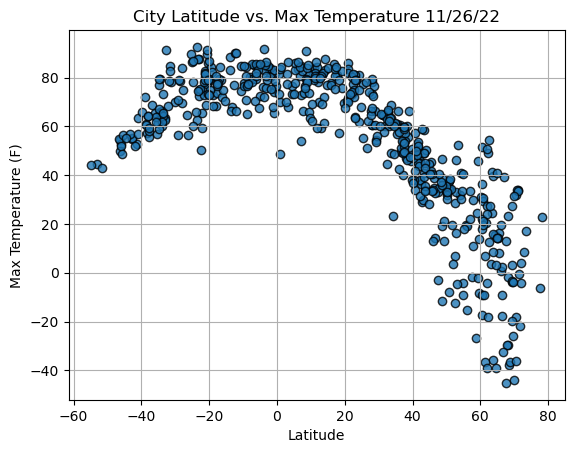

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

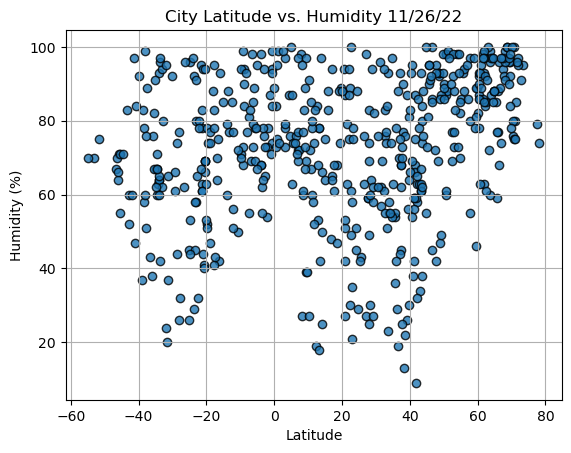

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

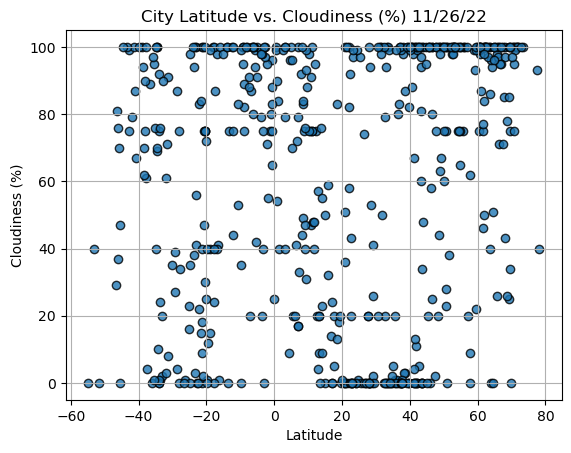

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

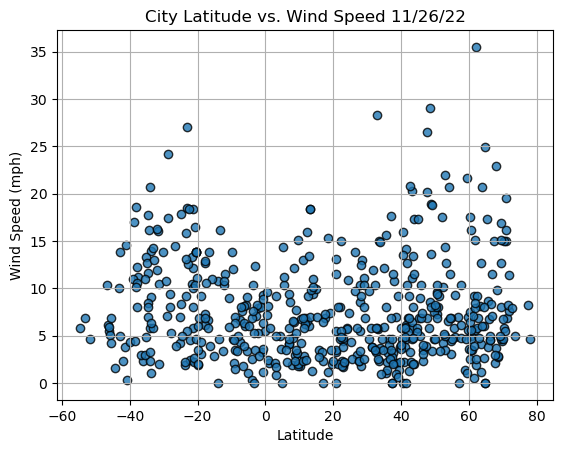

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                       Mehamn
Country                        NO
Date          2022-11-27 05:34:42
Lat                       71.0357
Lng                       27.8492
Max Temp                    33.75
Humidity                       80
Cloudiness                    100
Wind Speed                  14.97
Name: 13, dtype: object

In [38]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
537     True
538     True
539     True
540     True
541    False
Name: Lat, Length: 542, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pacific Grove,US,2022-11-27 05:31:26,36.6177,-121.9166,49.66,88,0,4.61
3,Jamestown,US,2022-11-27 05:30:27,42.0970,-79.2353,45.72,63,0,6.91
4,Hasaki,JP,2022-11-27 05:34:38,35.7333,140.8333,66.29,54,1,15.59
5,Dikson,RU,2022-11-27 05:34:38,73.5069,80.5464,16.92,95,100,5.01
6,Mahon,ES,2022-11-27 05:34:39,39.8885,4.2658,50.56,81,0,5.75
...,...,...,...,...,...,...,...,...,...
536,Naze,JP,2022-11-27 05:38:39,28.3667,129.4833,72.52,60,94,12.48
537,Payson,US,2022-11-27 05:38:40,40.0444,-111.7321,36.91,83,100,4.00
538,Bintulu,MY,2022-11-27 05:38:40,3.1667,113.0333,86.41,79,40,5.01
539,Nizwa,OM,2022-11-27 05:38:41,22.9333,57.5333,79.11,35,0,3.78


In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pacific Grove,US,2022-11-27 05:31:26,36.6177,-121.9166,49.66,88,0,4.61
3,Jamestown,US,2022-11-27 05:30:27,42.0970,-79.2353,45.72,63,0,6.91
4,Hasaki,JP,2022-11-27 05:34:38,35.7333,140.8333,66.29,54,1,15.59
5,Dikson,RU,2022-11-27 05:34:38,73.5069,80.5464,16.92,95,100,5.01
6,Mahon,ES,2022-11-27 05:34:39,39.8885,4.2658,50.56,81,0,5.75


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

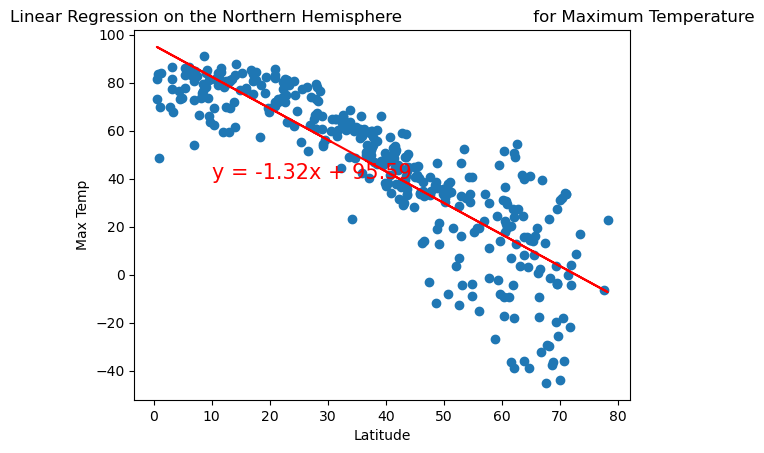

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

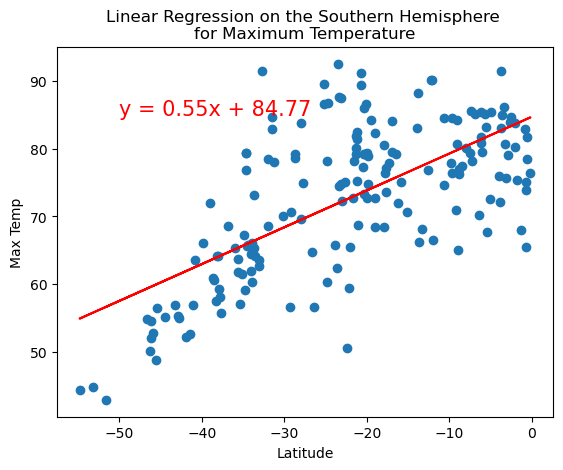

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

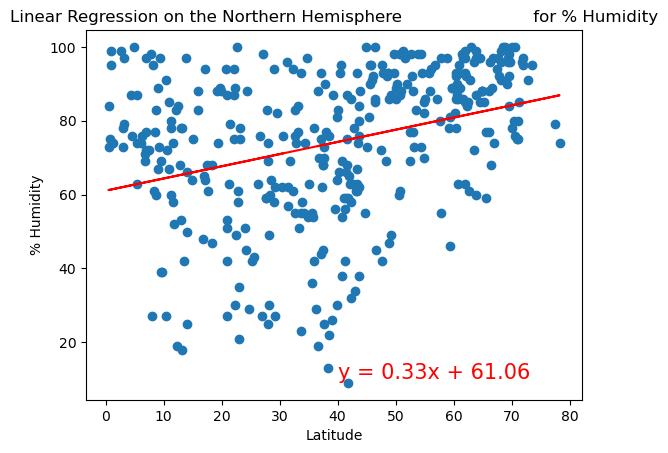

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

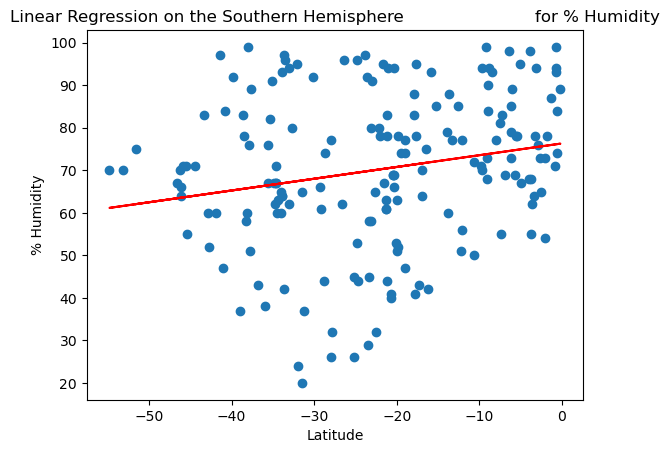

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

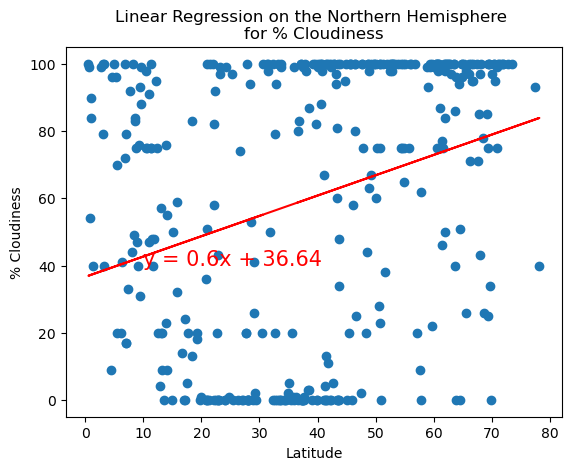

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

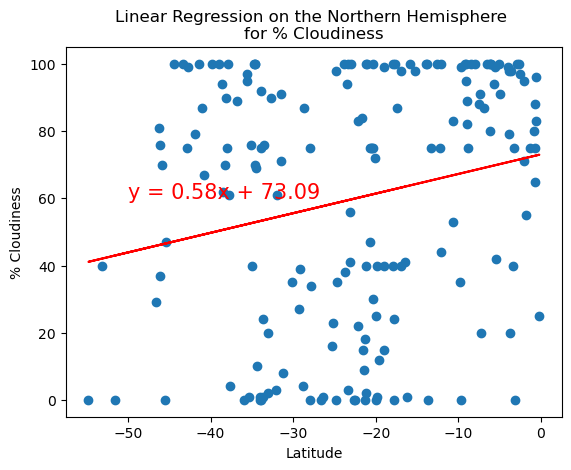

In [50]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

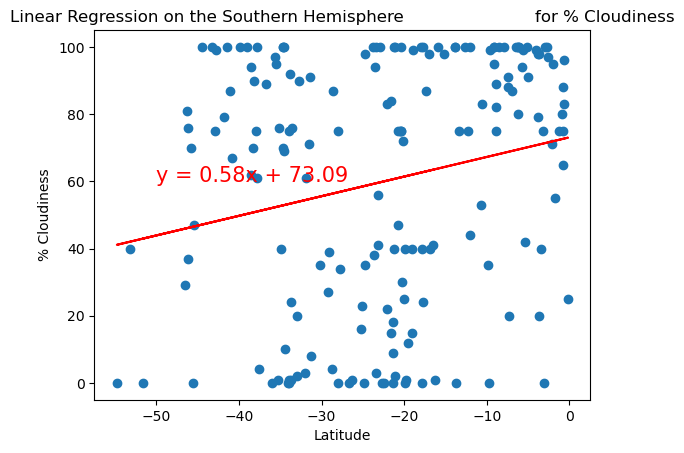

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

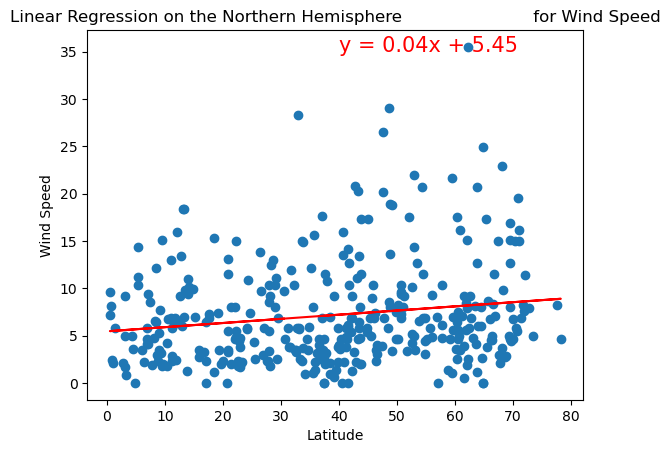

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

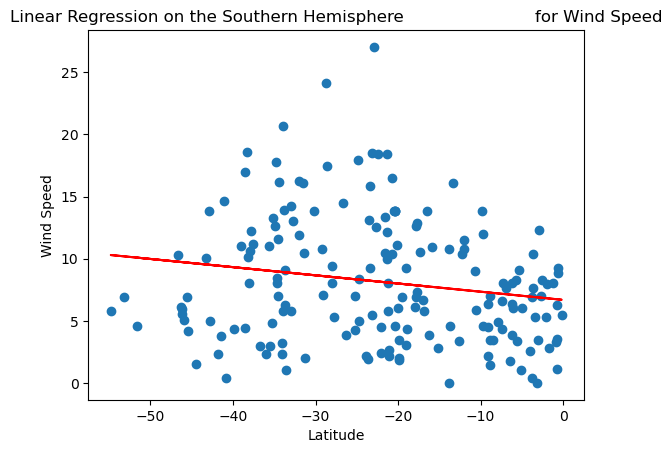

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [54]:
conda install -c conda-forge gmaps

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saint\anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39hcbf5309_2         985 KB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0 None
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0 None
  python_abi         

In [55]:
pip install gmaps 

Note: you may need to restart the kernel to use updated packages.
